<a href="https://colab.research.google.com/github/KimJunGu9/5.ML-DL/blob/main/4_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. kaggle

* kaggle.com
* 전세계 데이터 사이언티스트들이 다양한 데이터를 분석하고 토론할 수 있는 커뮤니트를 제공
* 데이터 분석 및 머신러닝, 딥러닝 대회를 개최
* 데이터셋, 파이썬자료, R자료 등을 제공

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train = pd.read_csv('http://bit.ly/fc-ml-titanic')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* PassengerId : 승객 아이디
* Survived : 생존 여부(1:생존, 0:사망)
* Pclass : 등급
* Name : 승객 이름
* Sex : 성별
* Age : 나이
* SibSp : 형제, 자매, 배우자 수
* Parch : 부모, 자식 수
* Ticket : 티켓 번호
* Fare : 요금
* Cabin : 좌석 번호
* Embarked : 탑승 항구

# 2. 데이터 전처리

In [ ]:
feature = ['Pclass', 'Sex', 'Age', 'Fare'] # 이 4개를 통해서 전처리를 할 것  
# feature는 일반 필드를 말한다. 어떤 데이터를 넣을 것인지를 feature라고 한다.
# feature는 x를 뜻함

# 그 많은 raw데이터 중에서 뽑아내야될 데이터를 정리하기 위해

label = ['Survived'] # 생존여부를 정답데이터로 쓸 것 # 정답이 뭐가 나와야하는지는 label이다
# label은 y를 뜻함

In [ ]:
train[feature].head() # 

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [ ]:
train[label].head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(train[feature], train[label], test_size = 0.2, random_state=10)

# train[feature], train[label] 로 구분해갖고 나눠줄 것
# test_size = 0.2 : 8 대 2로 나눔 -> 테스트를 20프로로 잡음
# random_state = 10 : 기준점을 10으로 놓는데 아무숫자나 넣어도 상관없음

In [ ]:
x_train.shape, y_train.shape

((712, 4), (712, 1))

In [ ]:
x_valid.shape, y_valid.shape

((179, 4), (179, 1))

# 3. 결측치 처리

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 결측치 개수 확인 : isnull().sum()

train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# 나이 결측치를 0으로 처리 후 통계정보 확인 - version 1

train['Age'].fillna(0).describe()

count    891.000000
mean      23.799293
std       17.596074
min        0.000000
25%        6.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
# 나이 결측치를 평균으로 처리 후 통계정보 확인 - version 2

train['Age'].fillna(train['Age'].mean()).describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

### 3-1. impute

* 2개 이상의 colunm을 한번에 함수 또는 수식을 처리할 때 사용


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean') # 특정함수에 ' ' 안에 넣기 (객체만들기)

# 'mean'을 한꺼번에 적용한다.



# strategy에 넣을 값들 

# mean : 평균값
# median : 중앙값
# most_frequent : 최빈값(제일 빈도가 많은 값)
# constant : 특정값 -> 예) SimpleImputer(strategy='constant', fill_value=값)

In [ ]:
# 'Age','Pclass'에다가 적용하기

imputer.fit(train[['Age', 'Pclass']]) # fit()를 통해서 결측치에 대한 mean 학습을 진행    # 평균을 적용하기 위해 객체만 만들어 놓고 실제데이터에 반영시키기않았음

# fit() 학습시킬때, 적용할때 많이 사용함. 

SimpleImputer()

In [ ]:
# 실제 데이터에 반영시키기

result = imputer.transform(train[['Age', 'Pclass']]) # transform()는 실제 결측치에 대한 값 변화를 적용  # 실제값을 변환 시키기



# 위와 아래를 같이써야 함 (*****)

# 값이 바뀌어서 확인은 되는데 train에 적용은 아직 안함. 왜냐면 result만 뽑아서 확인해본거지 아직 저장을 안했기때문이다.

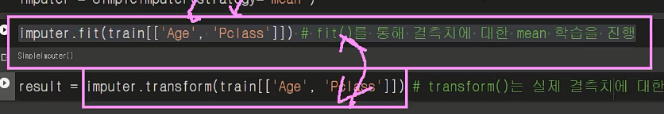

In [ ]:
# imputer.fit(train[['Age', 'Pclass']])
# result = imputer.transform(train[['Age', 'Pclass']])

# -------------------------- 위와 아래는 같다.

# result = imputer.fit_transform(train[['Age','Pclass']])


In [ ]:
result

array([[22.        ,  3.        ],
       [38.        ,  1.        ],
       [26.        ,  3.        ],
       ...,
       [29.69911765,  3.        ],
       [26.        ,  1.        ],
       [32.        ,  3.        ]])

In [ ]:
# 'Age', 'Pclass'에 저장하기

train[['Age', 'Pclass']] = result

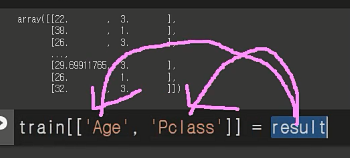

In [ ]:
# null값이 있는 지 확인하기

train[['Age', 'Pclass']].isnull().sum() 

Age       0
Pclass    0
dtype: int64

In [ ]:
train[['Age', 'Pclass']].describe()

,Age,Pclass
count,891.000000,891.000000
mean,29.699118,2.308642
std,13.002015,0.836071
min,0.420000,1.000000
25%,22.000000,2.000000
50%,29.699118,3.000000
75%,35.000000,3.000000
max,80.000000,3.000000


In [ ]:
##################################################################

In [ ]:
train['Embarked'].fillna('S')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [ ]:
# 최빈값이용해서 null값을 채우고, 데이터를 적용하기

imputer = SimpleImputer(strategy='most_frequent')

result = imputer.fit_transform(train[['Embarked', 'Cabin']])

In [ ]:
train[['Embarked', 'Cabin']] = result

In [ ]:
train[['Embarked', 'Cabin']].isnull().sum()

Embarked    0
Cabin       0
dtype: int64

# 4. Lable Encoding

* 문자(Categorical)를 수치(Numerical)로 변환

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


In [ ]:
def convert(data):
  if data == 'male':
    return 1
  elif data == 'female':
    return 0
    

In [ ]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
train['Sex'].apply(convert)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [ ]:
####################### 위와 아래의 작업이 같음

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
train['Sex_num'] = le.fit_transform(train['Sex'])   # train에 성별변수(Sex_num)를 만들고 거기에다가 학습을 시켜서

# 

In [ ]:
train['Sex_num'].value_counts()

1    577
0    314
Name: Sex_num, dtype: int64

In [ ]:
# 뭐가 라벨인코딩을 통해서 1과 0으로 만들었는지 알고싶다면

le.classes_

array(['female', 'male'], dtype=object)

In [ ]:
# 반대로 확인하고싶다면

le.inverse_transform([0, 1, 1, 0, 0, 1, 1])

array(['female', 'male', 'male', 'female', 'female', 'male', 'male'],
      dtype=object)

In [ ]:
# 탑승항구 알파벳이 숫자로 바꿔주고싶으면

le.fit_transform(train['Embarked'])

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,

In [ ]:
le.classes_

array(['C', 'Q', 'S'], dtype=object)

# 5. One Hot Encoding

In [ ]:
# 위에서 값이 변했기때문에 깨끗한 데이터를 가져오기

train = pd.read_csv('http://bit.ly/fc-ml-titanic')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 탑승항구를 가지고 값이 몇개가 있는지 확인하기

train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Nan 값을 'S'로 변환

train['Embarked'] = train['Embarked'].fillna('S')

In [ ]:
from sklearn.preprocessing import LabelEncoder



# 탑승항구를 라벨인코딩하기

train['Embarked_num'] = LabelEncoder().fit_transform(train['Embarked'])
# 라벨인코더 변수안만들고 쓰는방법 : LabelEncoder()를 쓴다

In [ ]:
train['Embarked_num'].value_counts()

2    646
0    168
1     77
Name: Embarked_num, dtype: int64

In [ ]:
# 'S' = 2, 'Q' = 1, 'C' = 0
# 머신러닝은 위 데이터의 관계성을 찾아서 Q + Q = S 라고 학습을 할 수 있음
# 따라서 독립적인 데이터는 별도의 column으로 분리하고 각각의 컬럼에 해당 값에만 True, 나머지를 False값을 같게하는 기술을 적용(원 핫 인코딩)
# 관계성을 갖지않게끔 행렬로 만들어서 처리
# 수식이 아니라 카테고리컬하게 만드는 것이 원핫인코딩

pd.get_dummies(train['Embarked_num'])[:5]

,0,1,2
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
pd.get_dummies(train['Embarked_num'])

,0,1,2
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0
